<a href="https://colab.research.google.com/github/Ke-erah/Cousera_Capstone/blob/master/DETE_and_TAFE_Employees_Exit_Surveys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The two data sets contain the following information:
1. An ID to identify the participant of the survey
2. The reason why the person's employment ended
3. The year or month the person's employment started and ended(the duration of employment)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url1 = 'http://opendata.dete.qld.gov.au/human-resources/tafe-employee-exit-survey-access-database-december-2013.csv'
tafe_survey = pd.read_csv(url1, encoding = 'cp1252')
tafe_survey.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [3]:
url2 = 'http://opendata.dete.qld.gov.au/human-resources/dete-exit-survey-january-2014.csv'
dete_survey = pd.read_csv(url2, encoding = 'UTF-8')
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge.     Current Age                                                  106
Employment Type.     Employment Type                                         106
Classification.     Classification                                           106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [9]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

### Dataset Description

TAFE DATASET
The dataset has 702 rows and 72 columns. Data type is mostly object.

The employees left for one of the followin reasons:Resignation, Contract Expired, Retrenchment/ Redundancy, Retirement, Transfer and Termination 

DETE DATASET
Dataset has 822 rows and 56 columns. Data type is mostly boolean and object. 

Employees left for one of the following reasons: Age/voluntary/ill health Retirement, Resignation, Contract Expired,Termination.

Some of the columns(such as diasbility) have almost all the rows as null values

# Identifying Missing Values and Drop Unnecessary Columns

The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN. The dete_survey.csv CSV file would be read into pandas again, but this time the Not Stated values would be read in as NaN. This would be done by setting the na_values parameter to 'Not Stated' in the pd.read_csv() function.


In [10]:
url1 = 'http://opendata.dete.qld.gov.au/human-resources/dete-exit-survey-january-2014.csv'
dete_survey = pd.read_csv(url1, encoding = 'cp1252', na_values = 'Not Stated')
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


The dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis. 

These columns (28 t0 48 in dete_survey) would be dropped and the result assigned to **'dete_survey_updated'**. Columns 17 to 65 would also be dropped in tafe_survey and the result assigned to **'tafe_survey_updated'**



In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [13]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [14]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    int64  
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

# **Cleaning Column Names**

Focusing on the column names: Each dataframe contains many of the same columns, but with different column names. For example, columns representing employee identities, ceassation dates, etc. 

Because the goal is to eventually combine the dataframes, there is a need to standardize the column names. 



In [15]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

In [16]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

The code above did the following:

1. made all the capitalization lowercase
2. removed any whitespace from the beginning and end of the strings
3. replaced spaceswith underscores

The standardized column names are easier to work with, and combine with other dataframes.

In [17]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

In [0]:
tafe_survey_updated.columns = ['id', 'Institute', 'WorkArea', 'cease_date',
       'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'gender', 'age',
       'employment_status',
       'position',
       'institute_service',
       'role_service']

In the code above,existing columnsin tafe_survey_updated representing data similar to those in dete frame were renamed to match those in dete_survey_updated which makes it easier to combine the two dataframes if the need arises.

In [19]:
dete_survey_updated.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes


In [20]:
tafe_survey_updated.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2


# **Filtering Data**

The goal is to answer the following question:

'Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?'

Examining the unique values in the separationtype columns in each dataframe, it can be seen that each contains a couple of different separation types. For this project/analysis, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [21]:
dete_separationtypes = dete_survey_updated['separationtype'].value_counts()
dete_separationtypes

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [22]:
dete_termination = dete_survey_updated[dete_survey_updated['separationtype']=='Termination']
dete_termination.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
77,78,Termination,2012,2007.0,2007.0,Public Servant,AO5-AO7,Central Office,Information and Technologies,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
79,80,Termination,2012,2007.0,2011.0,Public Servant,AO5-AO7,Central Office,Information and Technologies,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Male,26-30,NaN,NaN,NaN,NaN,NaN
84,85,Termination,2012,2010.0,2010.0,Public Servant,AO5-AO7,NaN,NaN,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,56-60,NaN,NaN,NaN,NaN,NaN
86,87,Termination,2012,2011.0,2011.0,Public Servant,A01-A04,South East,NaN,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
88,89,Termination,2012,2002.0,2011.0,Public Servant,AO5-AO7,Metropolitan,NaN,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,46-50,NaN,NaN,NaN,NaN,NaN


In [23]:
dete_other = dete_survey_updated[dete_survey_updated['separationtype']=='Other']
dete_other.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
38,39,Other,2012,1998.0,1998.0,Teacher Aide,NaN,Metropolitan,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,51-55,NaN,NaN,NaN,NaN,NaN
52,53,Other,2012,1982.0,1983.0,Teacher,Secondary,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,61 or older,NaN,NaN,NaN,NaN,NaN
66,67,Other,2012,1969.0,2007.0,Teacher,Secondary,NaN,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
67,68,Other,2012,NaN,NaN,Teacher Aide,NaN,Central Office,Education Queensland,Temporary Part-time,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
149,150,Other,2012,2008.0,2008.0,Public Servant,A01-A04,Central Office,Training and Tertiary Education Queensland,Permanent Full-time,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN


In [24]:
dete_contract = dete_survey_updated[dete_survey_updated['separationtype']=='Contract Expired']
dete_contract.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
73,74,Contract Expired,2012,2009.0,2011.0,Public Servant,AO5-AO7,Central Office,Information and Technologies,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,26-30,NaN,NaN,NaN,NaN,NaN
75,76,Contract Expired,2012,2010.0,2012.0,Public Servant,A01-A04,Central Office,Information and Technologies,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,26-30,NaN,NaN,NaN,NaN,Yes
78,79,Contract Expired,2012,2008.0,2012.0,Public Servant,AO5-AO7,Central Office,Information and Technologies,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,21-25,NaN,NaN,NaN,NaN,NaN
80,81,Contract Expired,2012,1968.0,2004.0,Public Servant,AO5-AO7,Central Office,Other,Temporary Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,61 or older,NaN,NaN,NaN,NaN,NaN
81,82,Contract Expired,2012,2011.0,2011.0,Technical Officer,NaN,Central Office,Education Queensland,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,21-25,NaN,NaN,NaN,Yes,NaN


In [25]:
pattern = 'Retirement'
dete_retirement = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(pattern)]
dete_retirement.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972.0,2007.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,56-60,NaN,NaN,NaN,NaN,NaN


In [26]:
pattern = 'Resignation'
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(pattern)]
dete_resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [27]:
tafe_separationtypes = tafe_survey_updated['separationtype'].value_counts()
tafe_separationtypes

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [28]:
tafe_termination = tafe_survey_updated[tafe_survey_updated['separationtype']=='Termination']
tafe_termination.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
38,634207971987250000,The Bremer Institute of TAFE,Delivery (teaching),2010.0,Termination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,634281450090309000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Termination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,51-55,Temporary Full-time,Administration (AO),1-2,1-2
127,634323732465523000,Southern Queensland Institute of TAFE,Delivery (teaching),2011.0,Termination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,46 – 50,Permanent Full-time,Administration (AO),7-10,7-10
182,634413870912500000,Sunshine Coast Institute of TAFE,Delivery (teaching),2011.0,Termination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,56 or older,Temporary Part-time,Teacher (including LVT),3-4,Less than 1 year
232,634497651258125000,Tropical North Institute of TAFE,Delivery (teaching),2011.0,Termination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,51-55,Contract/casual,Teacher (including LVT),Less than 1 year,Less than 1 year


In [29]:
tafe_transfer = tafe_survey_updated[tafe_survey_updated['separationtype']=='Transfer']
tafe_transfer.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
48,634212412239976000,Brisbane North Institute of TAFE,Non-Delivery (corporate),2010.0,Transfer,Career Move - Public Sector,-,-,-,Maternity/Family,-,Job Dissatisfaction,-,-,-,-,-,Female,31 – 35,Permanent Part-time,Administration (AO),7-10,7-10
70,634227157286851000,Brisbane North Institute of TAFE,Non-Delivery (corporate),2010.0,Transfer,-,-,-,-,-,-,Job Dissatisfaction,-,-,-,-,-,Female,51-55,Permanent Full-time,Administration (AO),3-4,3-4
76,634235863003594000,Barrier Reef Institute of TAFE,Delivery (teaching),2010.0,Transfer,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Female,51-55,Temporary Full-time,Teacher (including LVT),3-4,1-2
78,634239303982500000,Brisbane North Institute of TAFE,Non-Delivery (corporate),2010.0,Transfer,-,-,-,Ill Health,-,-,-,-,-,-,-,-,Female,31 – 35,Temporary Full-time,Administration (AO),1-2,1-2
110,634285952710835000,Southbank Institute of Technology,Non-Delivery (corporate),2011.0,Transfer,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
tafe_retrenchment = tafe_survey_updated[tafe_survey_updated['separationtype']=='Retrenchment/ Redundancy']
tafe_retrenchment.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
11,634171926251752000,Barrier Reef Institute of TAFE,Delivery (teaching),2010.0,Retrenchment/ Redundancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,56 or older,Permanent Part-time,Tutor,11-20,11-20
12,634171929735346000,Barrier Reef Institute of TAFE,Delivery (teaching),2010.0,Retrenchment/ Redundancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,51-55,Permanent Full-time,Teacher (including LVT),3-4,3-4
77,634238426001094000,Brisbane North Institute of TAFE,Non-Delivery (corporate),2010.0,Retrenchment/ Redundancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,51-55,Temporary Full-time,Administration (AO),1-2,1-2
187,634420617024687000,Brisbane North Institute of TAFE,Non-Delivery (corporate),2011.0,Retrenchment/ Redundancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,56 or older,Permanent Full-time,Administration (AO),5-6,1-2
205,634461102971094000,Central Queensland Institute of TAFE,Non-Delivery (corporate),2011.0,Retrenchment/ Redundancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
tafe_contract = tafe_survey_updated[tafe_survey_updated['separationtype']=='Contract Expired']
tafe_contract.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
25,634190913957094000,Brisbane North Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,41 – 45,Temporary Full-time,Administration (AO),Less than 1 year,Less than 1 year
30,634199520161313000,Southbank Institute of Technology,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,634199595826715000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,Tutor,Less than 1 year,Less than 1 year
43,634209019387633000,Sunshine Coast Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,56 or older,Permanent Full-time,Administration (AO),More than 20 years,More than 20 years


In [32]:
tafe_retirement = tafe_survey_updated[tafe_survey_updated['separationtype']=='Retirement']
tafe_retirement.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
28,634195084065465000,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
33,634201137431070000,Tropical North Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
34,634201997218101000,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,Male,56 or older,Permanent Full-time,Teacher (including LVT),More than 20 years,More than 20 years


In [33]:
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation']

tafe_resignation.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 – 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


# **Verifying the Data**

Now, before cleaning and manipulating the rest of the data, there is a need to verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). When working with real world data, it is best to not assume that the data being analyzed isn't corrupted in some way.

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, one can prevent completing a data analysis project that winds up being useless because of bad data.

First off, focus on the years in the cease_date and dete_start_date columns would be verified to ensure they make sense.

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If there are many years higher than the current date or lower than 1940, there may not be a desire to continue with the analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, they can be removed.

In [34]:
dete_resignation['cease_date'].value_counts().sort_index()

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: cease_date, dtype: int64

In [35]:
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str.get(-1).astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


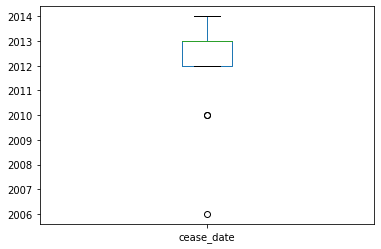

In [36]:
dete_resignation['cease_date'].plot(kind='box')

In [37]:
dete_resignation['dete_start_date'].describe()

count     283.000000
mean     2002.067138
std         9.914479
min      1963.000000
25%      1997.000000
50%      2005.000000
75%      2010.000000
max      2013.000000
Name: dete_start_date, dtype: float64

In [38]:
dete_start_years = dete_resignation['dete_start_date'].value_counts().sort_index()
dete_start_years

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

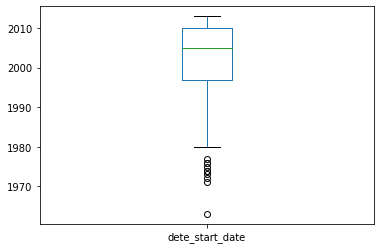

In [39]:
dete_resignation['dete_start_date'].plot(kind='box')
plt.show()

In [40]:
tafe_cease_years = tafe_resignation['cease_date'].value_counts().sort_index()
tafe_cease_years

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [41]:
tafe_resignation['cease_date'].describe()

count     335.000000
mean     2011.394030
std         1.005952
min      2009.000000
25%      2011.000000
50%      2011.000000
75%      2012.000000
max      2013.000000
Name: cease_date, dtype: float64

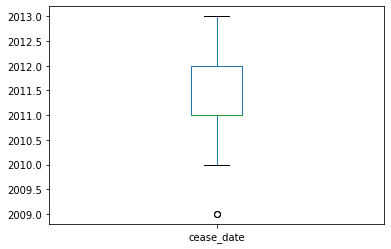

In [42]:
tafe_resignation['cease_date'].plot(kind='box')
plt.show()

# Creating New Column

The years (start and cease) seem to be correct enough. This is because there is no start year beforr 1940 and no cease dates past the current date.

Even though there are quite  number of outliers in the start years in the dete data, the outliers are still within the relistic years range for the data.

As the years in the dete_resignation dataframe have been verified, they have been used to create a new column named 'cease_year'. 

Recall that the end goal is to answer the following question:

**Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?**

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their **years of service**.

The tafe_resignations dataframe already contains a "service" column, which was renamed to **institute_service**. In order to analyze both surveys together, there is a need to create a corresponding institute_service column in dete_resignations.

In [43]:
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
dete_resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


Since the goal is to find the relationship between service duration and dissatisfaction, there is a need to have a column representing the duration of service for each employee. This is what was done above by subtracting the start_date from cease_date and assigning the result to a new column named "institute service"

# Identifying Dissatisfied Employees

Next stop is to identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

**tafe_survey_updated:**
1. Contributing Factors. Dissatisfaction
2. Contributing Factors. Job Dissatisfaction
**detesurveyupdated:**
1. job_dissatisfaction
2. dissatisfaction_with_the_department
3. physical_work_environment
4. lack_of_recognition
5. lack_of_job_security
6. work_location
7. employment_conditions
8. work_life_balance
9. workload

If the employee indicated any of the factors above caused them to resign, they will be marked as dissatisfied in a new column.

In [45]:
# TAFE Dataframe
tafe_resignation.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 – 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [46]:
# TAFE Dataframe
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [47]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [0]:
# creating function
def update_vals(value):
  if pd.isnull(value):
    return np.nan
  elif value== '-':
    return False
  else:
    return True

In [49]:
#applying the created functions to the dissatisfaction columns and creating a new column 'dissatisfied
tafe_resignation['dissatisfied'] = tafe_resignation[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction' ]].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignation_up = tafe_resignation.copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
tafe_resignation_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 – 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [51]:
tafe_resignation_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [52]:
# DETE Dataframe
dissatisfied_cols = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']
dete_resignation['dissatisfied'] = dete_resignation[dissatisfied_cols].any(axis=1, skipna=False)
dete_resignation_up = dete_resignation.copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
dete_resignation_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

The goal was to map employee's dissatisfaction to True, False or NaN(in cases where the information is not available) to help make it easier to determine if an employee resigned because of job dissatisfaction.

In the TAFE data, this was achieved by creating a function that converts the job dissatisfaction to True, False or NaN respectively in the new column 'dissatisfied' created. The values created were then assigned to a new column 'dissatisfied' as appropriate using the df.any() method.

The created function was not applied to the dete dataframe because the values are already saved as True or False.

The new column created indicates whether or not an employee due to any form of dissatisfaction.

# **Combining Dataframes/Data**

In [0]:
#Addin institute column to DETE and TAFE resignation Dataframes
dete_resignation_up['institute'] = 'DETE'
tafe_resignation_up['institute'] = 'TAFE'

In [0]:
combined = pd.concat([dete_resignation_up, tafe_resignation_up], axis=0)

In [56]:
combined.describe(include='all')

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
count,6.510000e+02,651,635.000000,283.000000,271.000000,598,161,265,32,597,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,592,596,7,0,3,8,9,563,643,651,340,340,332,332,332,332,332,332,332,332,332,332,332,332,290
unique,NaN,4,NaN,NaN,NaN,21,8,8,9,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,17,1,0,1,1,1,49,2,2,10,2,2,2,2,2,2,2,2,2,2,2,2,2,7
top,NaN,Resignation,NaN,NaN,NaN,Administration (AO),Primary,Central Queensland,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,51-55,Yes,NaN,Yes,Yes,Yes,Less than 1 year,False,TAFE,Southern Queensland Institute of TAFE,Non-Delivery (corporate),-,-,-,-,-,-,-,-,-,-,-,-,Less than 1 year
freq,NaN,340,NaN,NaN,NaN,148,58,45,14,256,290,244,291,270,282,305,278,297,293,288,268,252,285,292,300,243,284,283,424,71,7,NaN,3,8,9,73,403,340,72,217,284,233,319,311,312,277,270,308,316,315,246,316,92
mean,3.314265e+17,NaN,2011.963780,2002.067138,1999.653137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.172210e+17,NaN,1.079028,9.914479,109.965675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000e+00,NaN,2006.000000,1963.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.525000e+02,NaN,2011.000000,1997.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.341820e+17,NaN,2012.000000,2005.000000,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.345770e+17,NaN,2013.000000,2010.000000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
combined_updated = combined.dropna(axis=1,thresh=500)

In [58]:
combined_updated.describe(include='all')

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
count,6.510000e+02,651,635.000000,598,597,592,596,563,643,651
unique,NaN,4,NaN,21,6,2,17,49,2,2
top,NaN,Resignation,NaN,Administration (AO),Permanent Full-time,Female,51-55,Less than 1 year,False,TAFE
freq,NaN,340,NaN,148,256,424,71,73,403,340
mean,3.314265e+17,NaN,2011.963780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.172210e+17,NaN,1.079028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000e+00,NaN,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.525000e+02,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.341820e+17,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.345770e+17,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The end goal is to aggregate the data according to the institute_service column to answer the quesstion of whether or not years of service is linked to job dissatisfaction.

Now, the datasets would be combined.

After combining the datasets, columns with less than 500 entries were deleted because they do not contain any additional information that would be beneficial to the analysis in view.

# **Cleaning Service Column**

Before proceeding, there is a need to clean up the institute_service column. This column is tricky to clean because it currently contains values in different forms.

To analyze the data, the numbers would be converted into categories.

The anlaysis would be based on an article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective. The definitions below would be used:

1. New: Less than 3 years at a company
2. Experienced: 3-6 years at a company
3. Established: 7-10 years at a company
4. Veteran: 11 or more years at a company

In [59]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [60]:
# extracting the years of service from each value in the institute_service column.
pattern = r"(\d+)"
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(pattern)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
combined_updated['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [0]:
def career_stage(value):
  if pd.isnull(value):
    return np.nan
  if value < 3:
    return 'New'
  elif (value >= 3) and (value<=6):
    return 'Experienced'
  elif (value >= 7) and (value<=10):
    return 'Established'
  else:
    return 'Veteran'

In [64]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

The institute_service was categorized into new, experienced, established and veteran. This would help make the analysis easirer to do since the goal is to find out the proportion of workers that resigned due to job dissatisfaction after working for short or long periods.

The duration of service was obtained as a float by extraction from the 'institite_service' column. This was then mapped to a category through a function that was created.

# **Initial Analysis**

NB: the dissatisfied column consists of Boolean values, meaning they're either True or False. Methods such as the df.pivot_table() method actually treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. That means that we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.

In [66]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [67]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [69]:
mean_dissatisfaction = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
mean_dissatisfaction

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


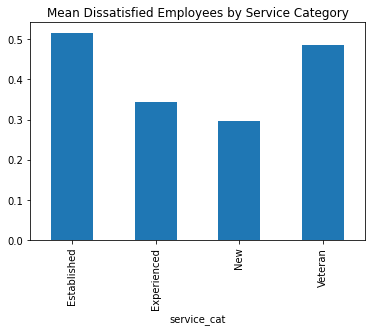

In [70]:
mean_dissatisfaction.plot(kind='bar', legend=False, title = 'Mean Dissatisfied Employees by Service Category')


The pivot table and bar plot makes it clear that employees that have worked for longer are more dissatisfied with the job. This is because Established and Veteran employees have a higher dissatisfaction mean than the New and Experienced employees.

More than half of the Established and Veteran Categories resigned because of job dissatisfaction while more than half of the New and Experienced employees left for reasons other than job dissatisfaction.

# **Further Analysis**

## Cleaning Age Column

Goal here is to find how many people in each age group resgined due to some kind of dissatisfaction. 



In [71]:
#check the unique ages in the dataframe
combined_updated['age'].value_counts()

51-55            71
41-45            48
41 – 45          45
46-50            42
36-40            41
46 – 50          39
26-30            35
21 – 25          33
26 – 30          32
31 – 35          32
36 – 40          32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [72]:
#Extract the age in each age data
pattern = r'(\d+)'
combined_updated['age'] = combined_updated['age'].str.extract(pattern).astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
combined_updated['age'].value_counts(dropna=False).sort_index()

20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    23
NaN     55
Name: age, dtype: int64

In [0]:
#define function to change age value into age category
def age_cat(value):
  if pd.isnull(value):
    return np.nan
  elif value < 30:
    return '20s'
  elif value < 40:
    return '30s'
  elif value<50:
    return '40s'
  elif value<60:
    return '50s'
  else:
    return '60s'

In [77]:
#add new column 'age_category' to the dataframe
combined_updated['age_category'] = combined_updated['age'].apply(age_cat)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
combined_updated['age_category'].value_counts(dropna=False)

40s    174
20s    139
30s    134
50s    126
NaN     55
60s     23
Name: age_category, dtype: int64

In [84]:
#aggregate dissatisfactio by age group using pivot table
age_of_resignation = combined_updated.pivot_table(values='dissatisfied', index='age_category')
age_of_resignation

,dissatisfied
age_category,
20s,0.352518
30s,0.358209
40s,0.379310
50s,0.404762
60s,0.521739


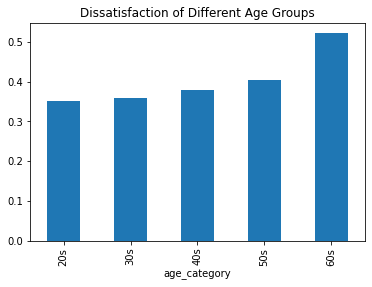

In [86]:
#visualie the aggregation using a bar plot
age_of_resignation.plot(kind='bar', title = 'Dissatisfaction of Different Age Groups', legend=False)

Dissatisfaction appeared to increase with age: at least 50% of employees in their 60s are dissatisfied one way or another but less than 40% in their 20s are dissatisfied.

## **DETE vs TAFE Analysis**

# DETE Data Analysis

In [98]:
dete_rows = combined_updated[combined_updated['institute'] == 'DETE']
dete_rows['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [99]:
tafe_rows =  combined_updated[combined_updated['institute'] == 'TAFE']
tafe_rows['dissatisfied'].value_counts()

False    249
True      91
Name: dissatisfied, dtype: int64

In [0]:
dete_tafe_pv = combined_updated.pivot_table(values='dissatisfied', index ='institute')

In [101]:
dete_tafe_pv

,dissatisfied
institute,
DETE,0.479100
TAFE,0.267647


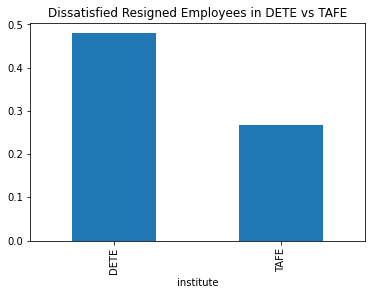

In [102]:
#Plotting the PV
dete_tafe_pv.plot(kind='bar', legend=False, title = 'Dissatisfied Resigned Employees in DETE vs TAFE')

More employees resigned because of job dissatisfaction in DETE(almost 50%) compared to TAFE resignation where only about 25% resigned because of job dissatisfaction.

# **Conclusion**

Overall, more dete employees resigned because of job dissatisfaction than tafe employees.

Older employees appear to quit more for job dissatisfaction reason than younger ones. Similar pattern was observed for years of experience category.